# Phys 434 Lab 3 -- Aureliano Liu

In [45]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pandas as pd

In [46]:
#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

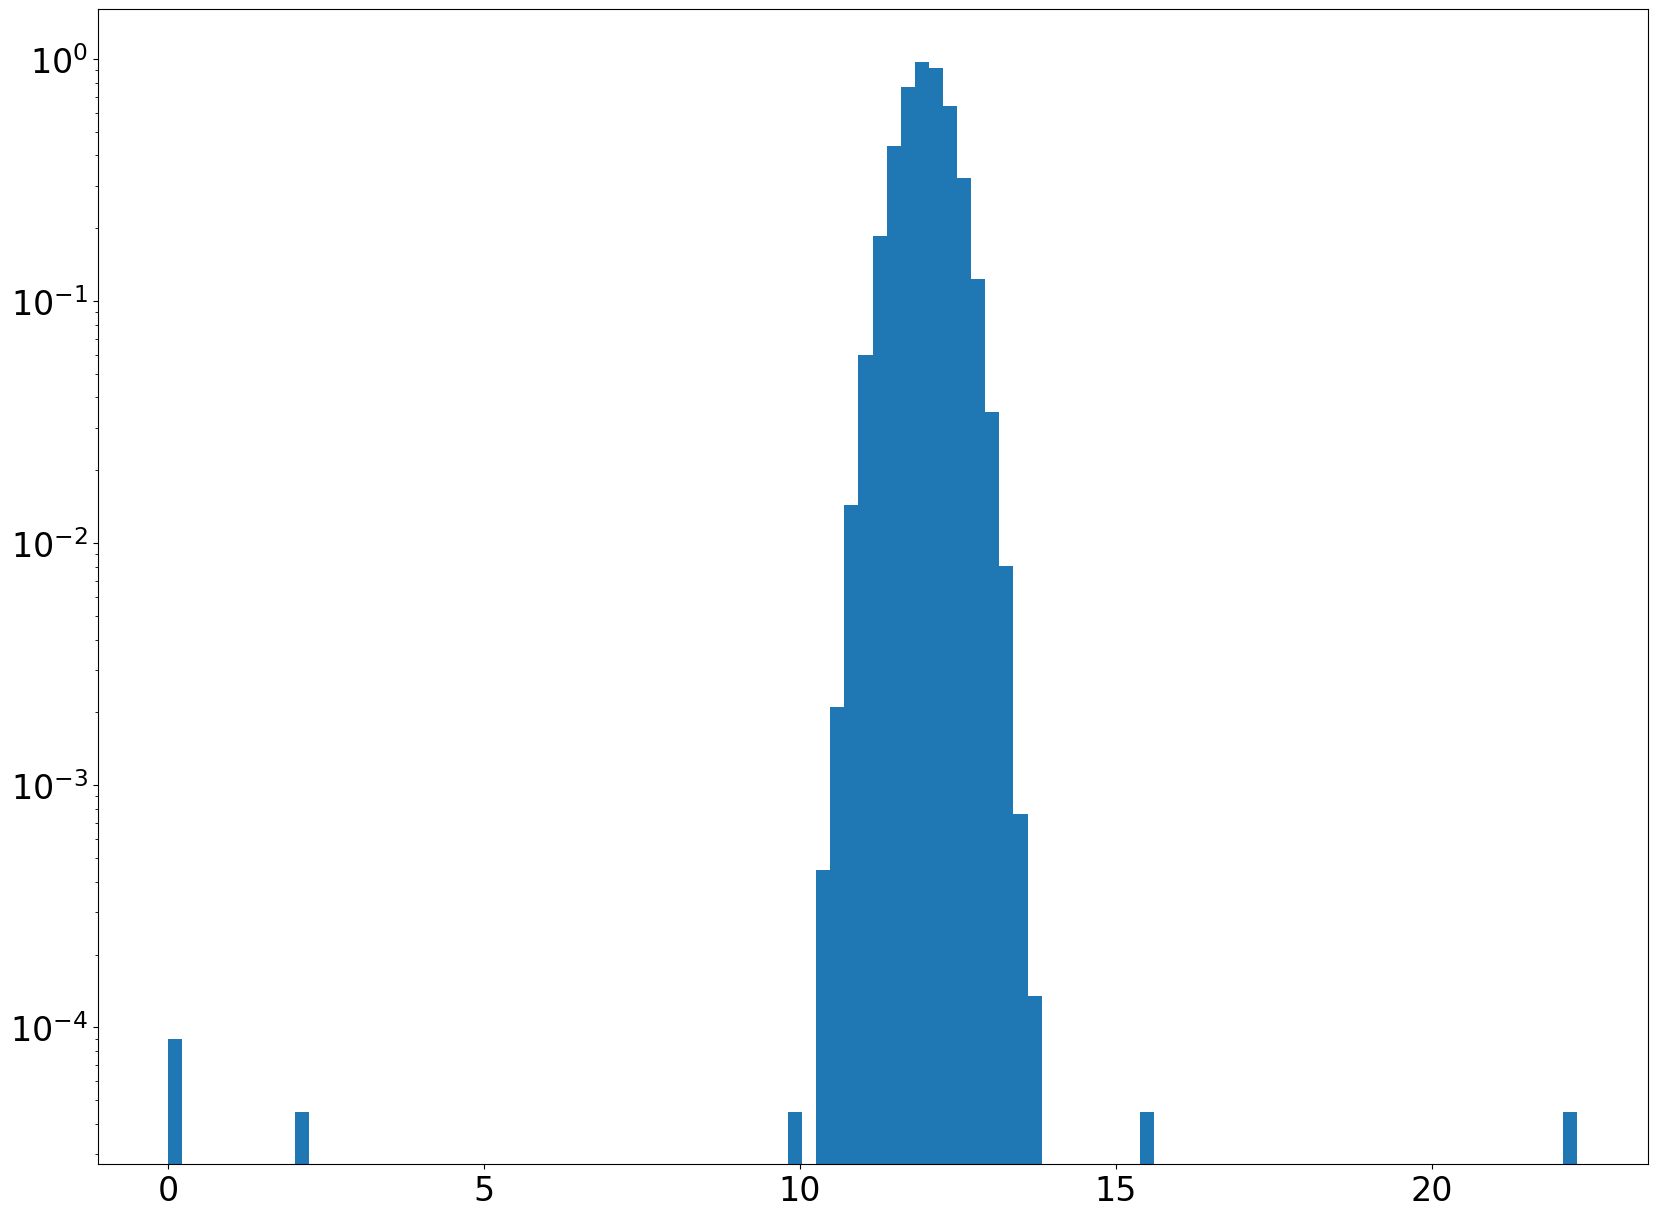

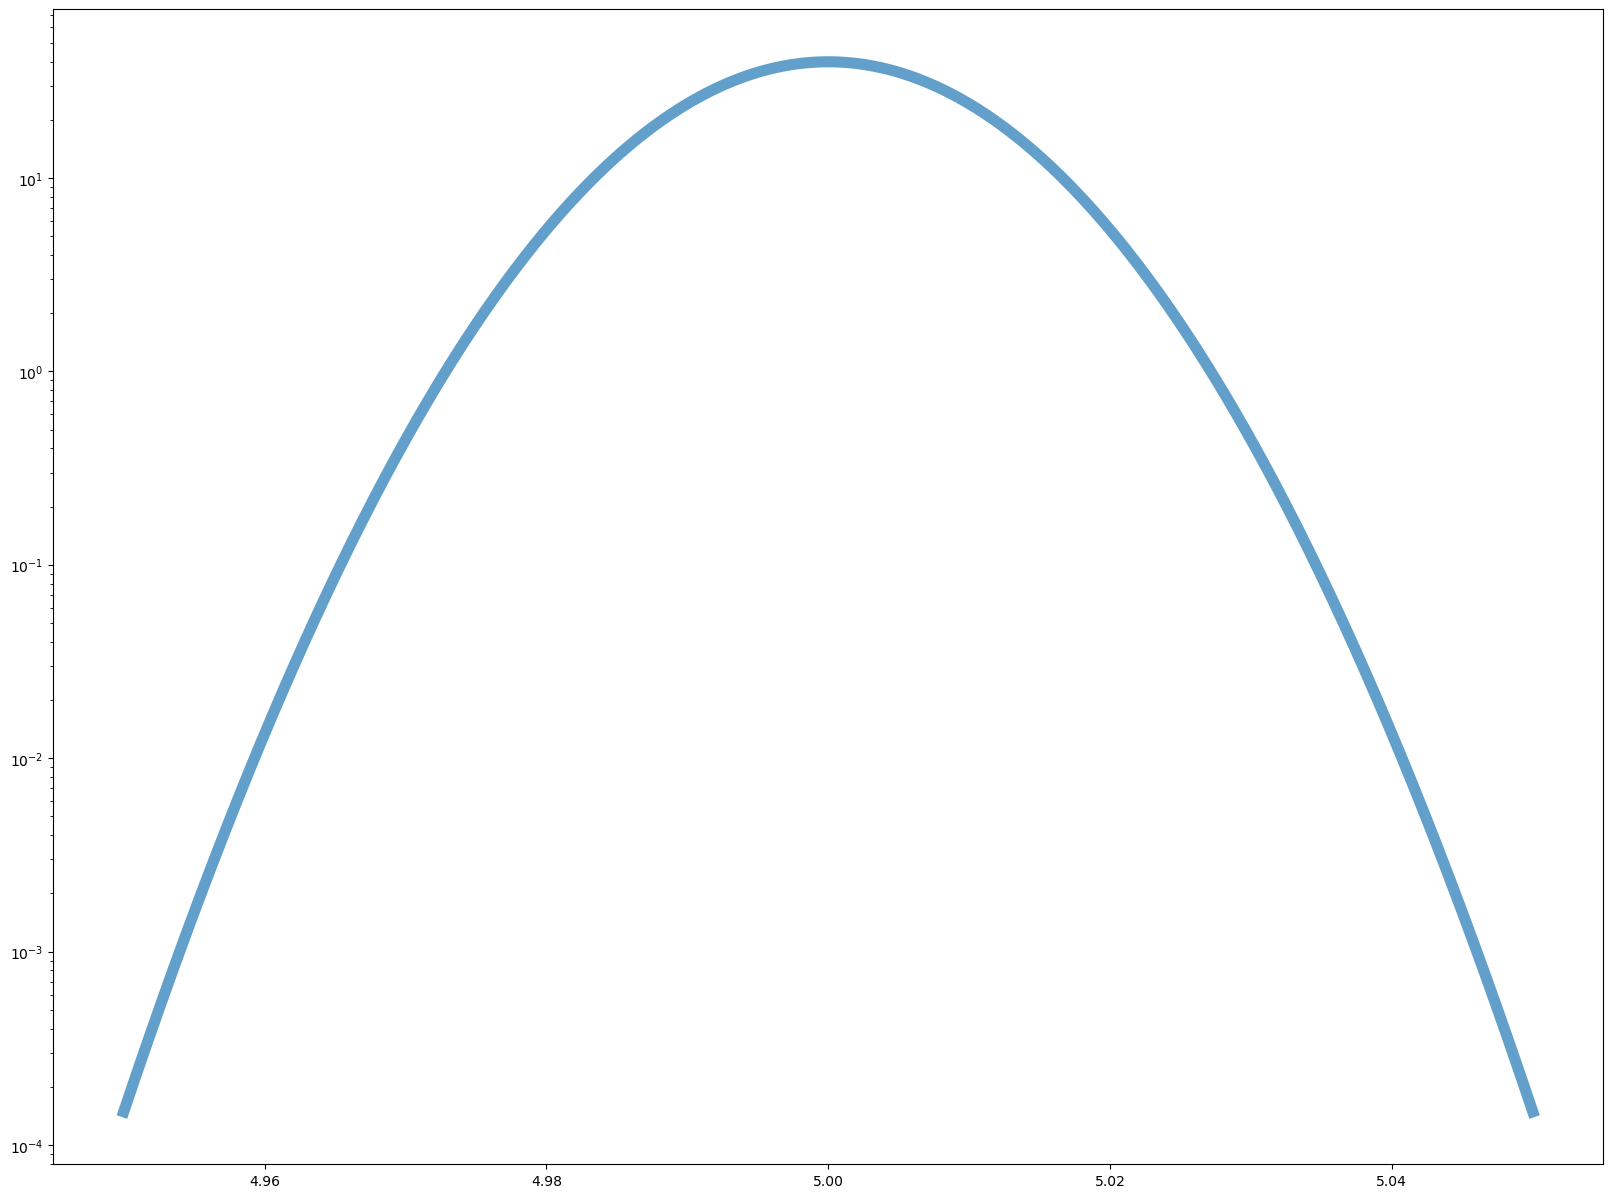

In [47]:
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True)
plt.tick_params(labelsize = 24)
plt.yscale('log')
plt.show()
fig2,ax2 = plt.subplots()
x = np.linspace(4.95,5.05,1000)
plt.yscale("log")
ax2.plot(x,stats.norm.pdf(x,loc = 5., scale = 0.01),linewidth = 8,alpha = 0.7)

### Question 1 

#### Part A

1. From the plots above, we can see the outliers are between 0 and 25, and they can be seen clearly on the log plot. 
The smooth log plot indicates the expected Gaussian log distribution, while the plot above indicates the histogram with those noise data given

2. The statistical question we can ask is :  
what is the probability that the measurement we read is from the normal background instead of an outlier in this case

3. In math we can say : if we read a point with value of $x_0$ 
 $$1 - \int_{-\infty}^{x_0} pdf(x) dx $$

4. Code as below

In [48]:
true = np.array([])
false = np.array([])

for value in d:
    det = stats.norm.ppf(1-stats.norm.cdf(value,loc = 12., scale = 0.4))
    if(np.abs(det) > 5):
        false = np.append(false,value)
    else:
        true = np.append(true,value)

In [49]:
d = {"True T": [1000000,0],"Bad T" : [3,5]}
pd.DataFrame(data=d,index=["Your test good","Your test Bad"])

,True T,Bad T
Your test good,1000000,3
Your test Bad,0,5


#### Part B

By changing the threshold of sigma, we can conclude that :
Decreasing the threshold of sigma will mark more true T to be tested as bad. 

#### Part C

There are 3 bad data points marked as Good in this case with 5 sigma threshold. 
From the histogram above we can guess that these 3 points are very close to the real Gaussian distribution points.   
We can try to avoid it: Increasing the threshold of sigma will make more bad data points being marked as good. 

### Question 2

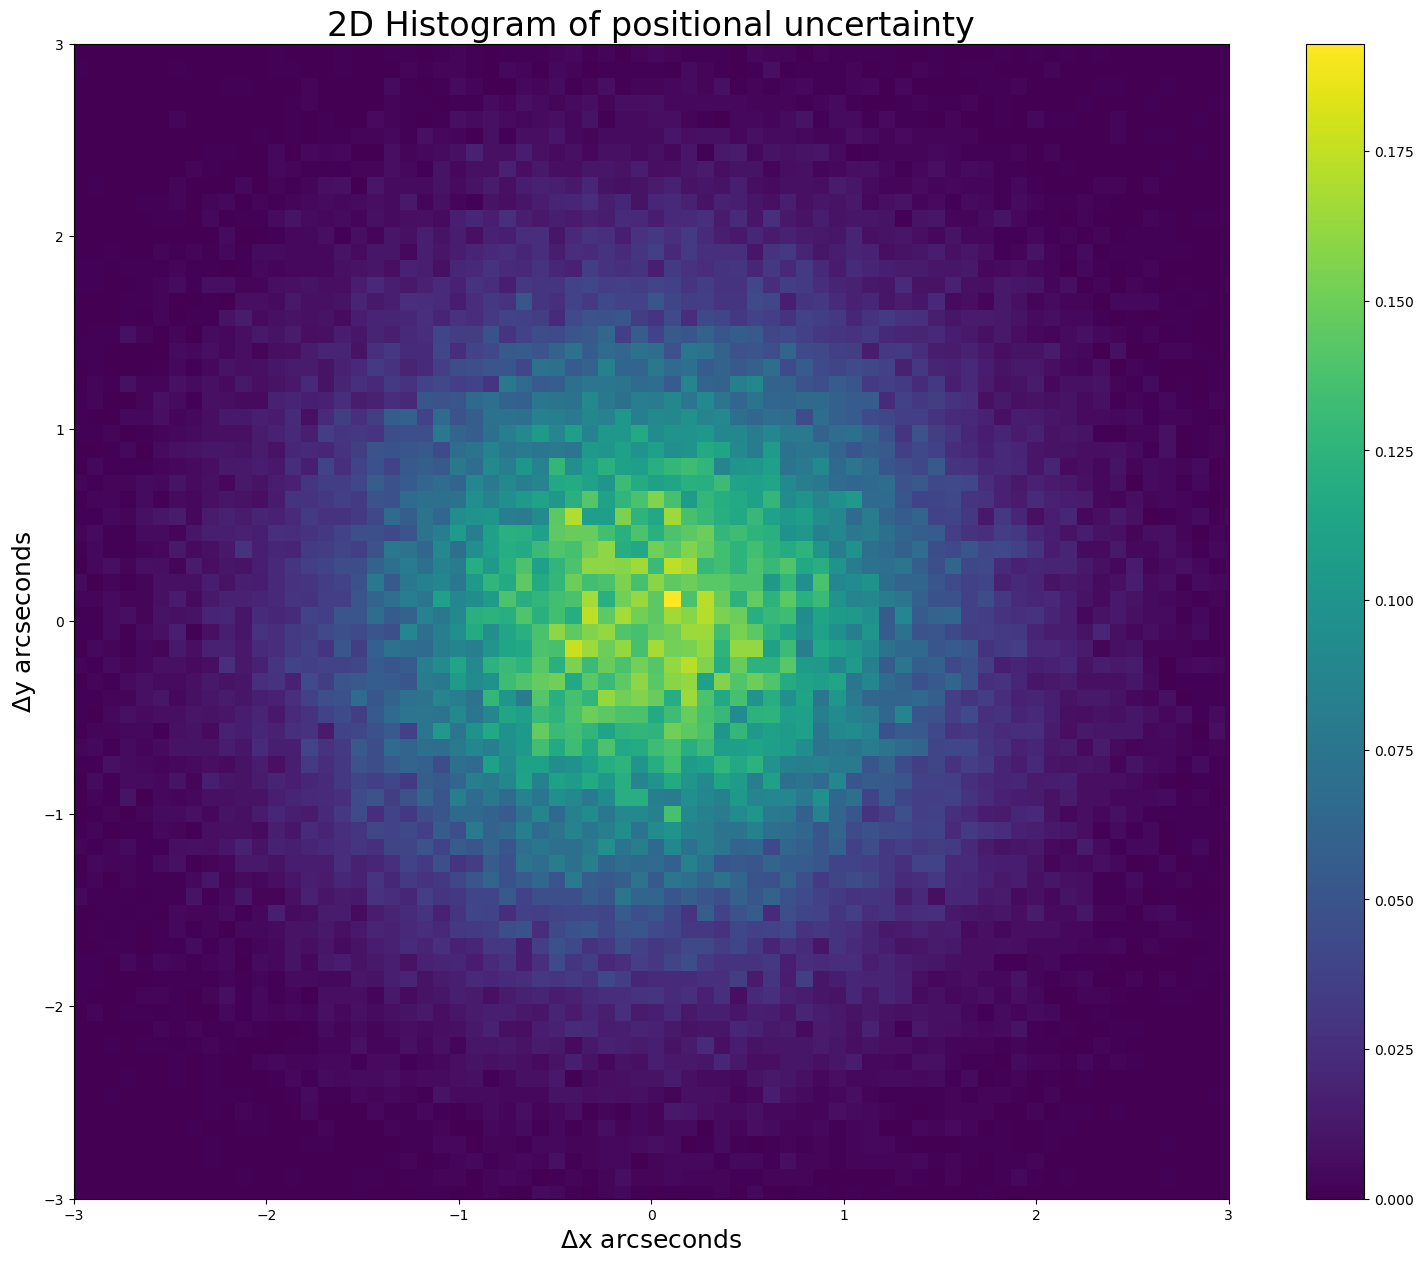

In [50]:
a = np.vstack((stats.norm.rvs( scale = 1, size = 100000), stats.norm.rvs( scale = 1, size = 100000)))
a.shape
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(a[0,:],a[1,:],bins=100, density=True);
ax.set_aspect('equal', 'box')
plt.xlim([-3 , 3])
plt.ylim([-3 , 3])
plt.title("2D Histogram of positional uncertainty", fontsize = 24)
plt.ylabel("$\Delta$y arcseconds", fontsize = 18)
plt.xlabel("$\Delta$x arcseconds", fontsize = 18)
plt.colorbar(h[3], ax=ax)

We know from the HW 3 that the distance distribition of 2D Gaussian is Rayleigh. 
So we can plot the Rayleigh's pdf out :

In [51]:
x = np.linspace(stats.rayleigh.ppf(0.01),stats.rayleigh.ppf(0.99),1000)
pdf = stats.rayleigh.pdf(x)

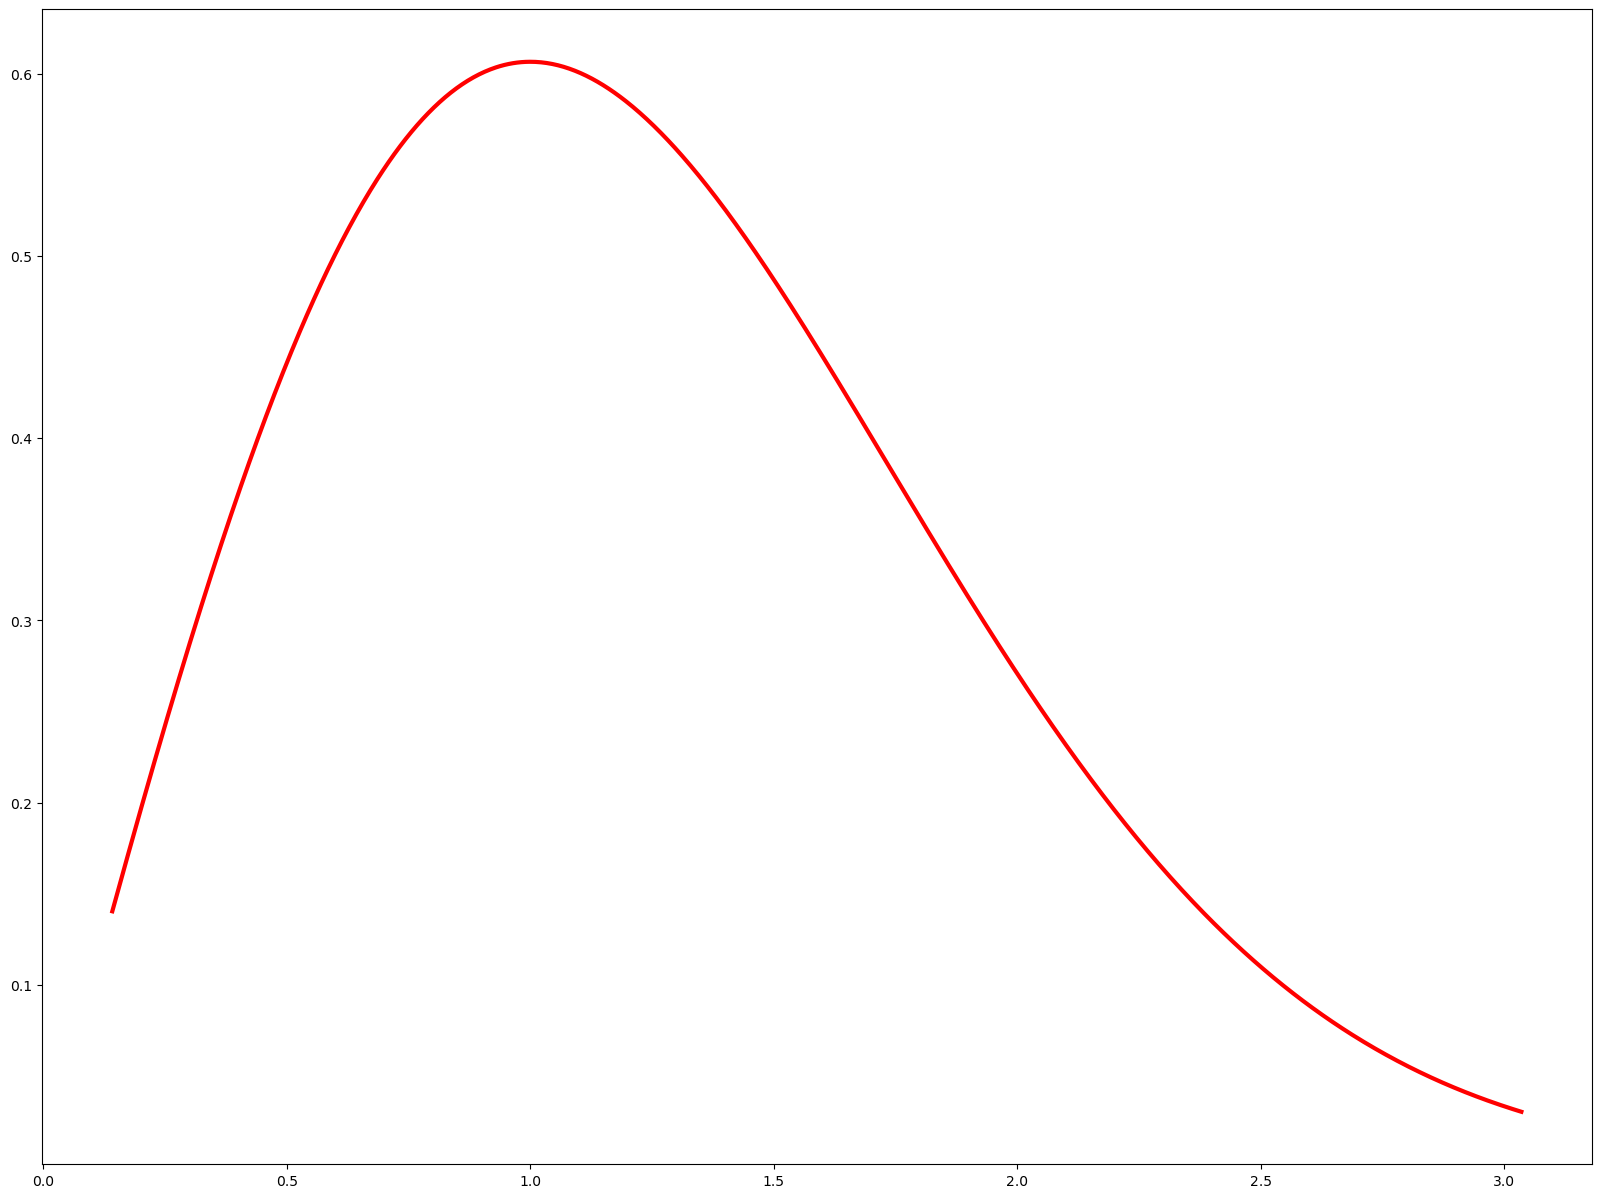

In [52]:
fig,ax = plt.subplots()
ax.plot(x,pdf,'r',lw = 3)

#### 1. 

In words, we can ask : 
What minimal measurement in the rayleigh distribution do we need so that the sigma value of such reading is more than 5 significance

#### 2. In math, the question becomes :

Integral :  $$1 - \int_{-\infty}^{???} Rayleigh's \: pdf(x) dx  >> 5 sigma $$

#### 3. The distance can be calculated as :

In [53]:
sig5 = 1/3.5e6
det = stats.rayleigh.ppf(1 - sig5)
det

5.489676406965609

#### So the distance threshold we need for 5 sigma detection is around 5.5

### Question 3

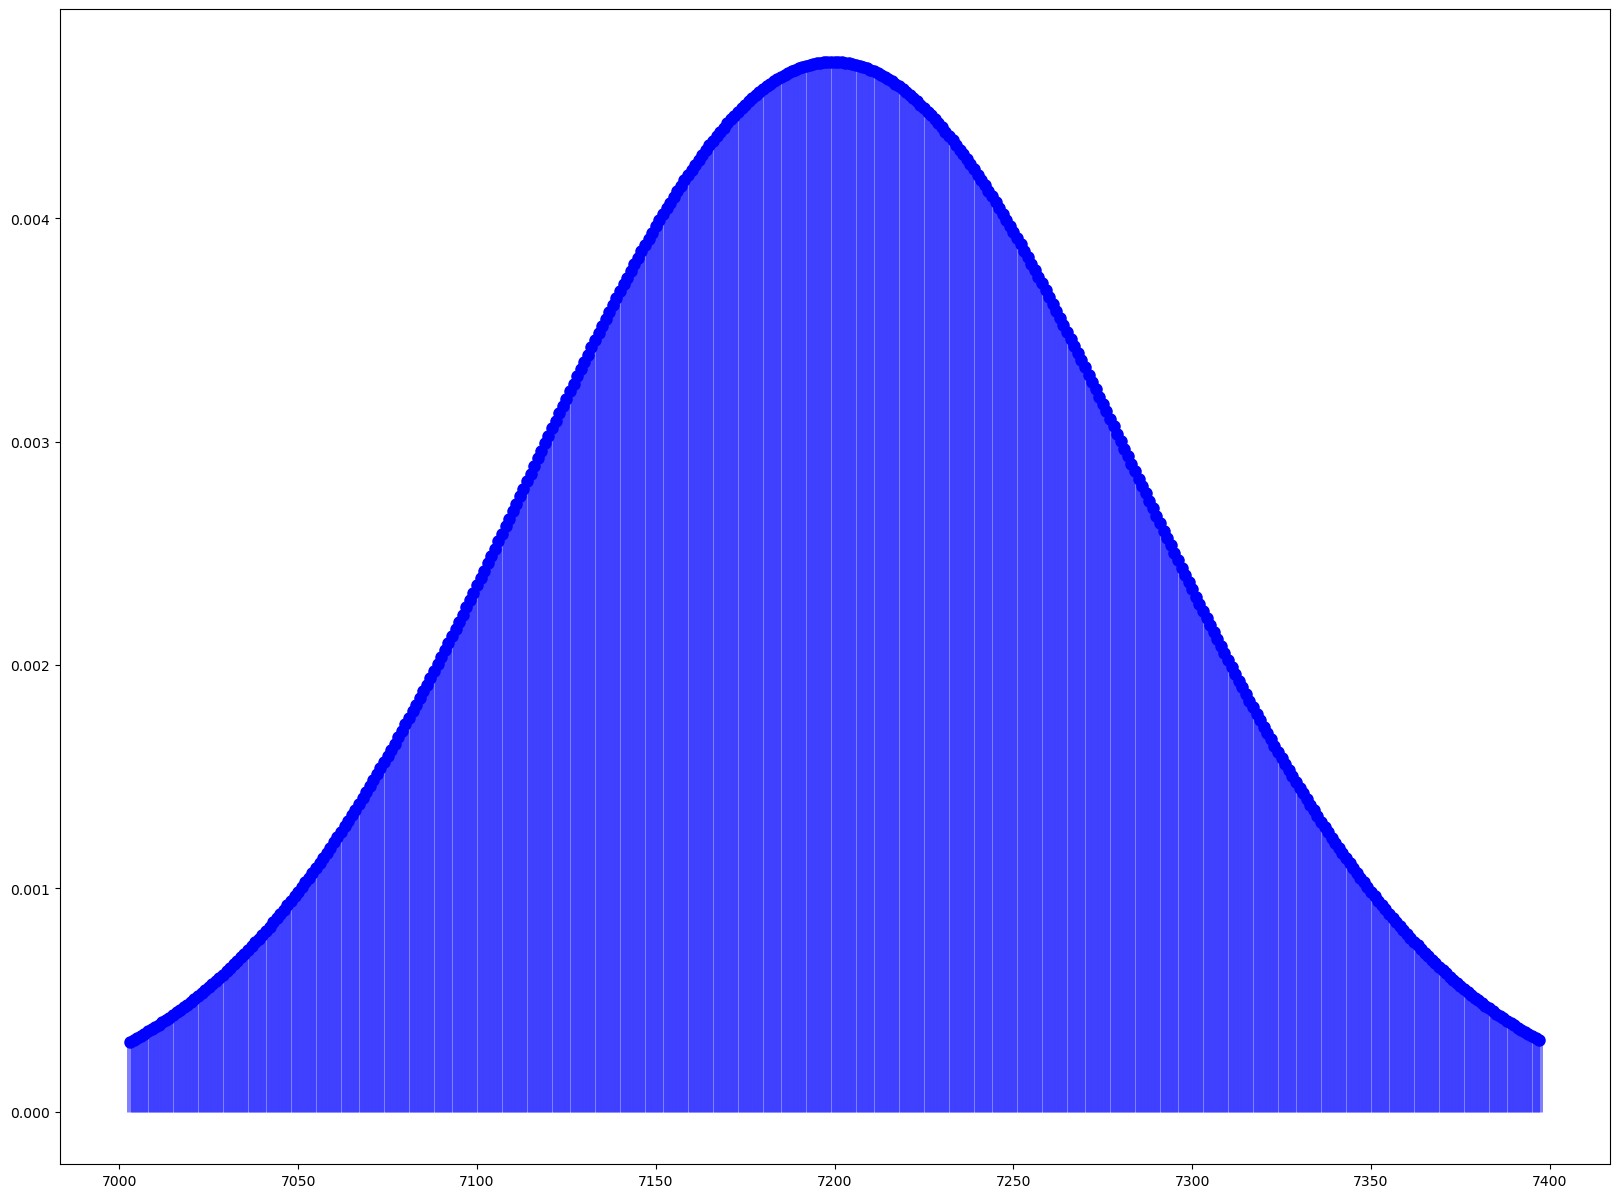

In [54]:
mu = 7200
fig,ax = plt.subplots()
x = np.arange(stats.poisson.ppf(0.01, mu),stats.poisson.ppf(0.99, mu),1)
#plt.yscale("log")
ax.plot(x, stats.poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, stats.poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)

#### Part 1

The question we can ask is : what's the probability that the measurment, 6800 in this case, is from the background hiss instead of a significant signal? 

#### Part 2

As described from above, our distribution is Rayleigh, and then question after translating into math is : 

Integral :  $$1 - \int_{-\infty}^{6800} Poisson's \: pdf(x) dx \; >? \;  5  sigma $$

#### Part 3

In [55]:
stats.norm.ppf(1 - stats.poisson.cdf(6800,mu))

4.750747965778662

#### Since the sigma value is less than 5 sigma, the reading of 6800 is insignificant

#### Part 4: Some comments of this question

1. we used the Poisson distribution in this case since the event is rare and discrete
2. our mean value for the Poisson distribution is $1*8*60*15 = 7200 $
3. with a mean of 7200, Poisson distribution behaves like a Gaussian, which is consistent with Central limit theorem \
we can use the log plot above, and we will see that the pdf become to be a prabola-shape